## 載入套件

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import csv
np.random.seed(49)

Using TensorFlow backend.


## 讀入資料

In [2]:
train_df = pd.read_csv('C:/Users/Pan/Desktop/Tianic/train.csv')
test_df = pd.read_csv('C:/Users/Pan/Desktop/Tianic/test.csv')
train_data = train_df

In [3]:
train_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 把 Cabin、Ticket、Name 、PassengerId 類別從資料移除

In [4]:
PassengerId = train_data['PassengerId']
train_data = train_data.drop(columns=['Cabin','Ticket','Name','PassengerId'],axis=1)
train_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print(train_data.shape)
print(train_data.dtypes)

(891, 8)
Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


### 確認各個類別的遺失值

In [6]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
age_mean = train_data['Age'].mean()
train_data['Age'] = train_data['Age'].fillna(age_mean)

In [8]:
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [9]:
onehot_data = pd.get_dummies(data=train_data, columns=['Embarked']) #對Embarked做dummy variable
onehot_data[:2]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0


In [10]:
ndarray = onehot_data.values
ndarray.shape
ndarray[:2]

array([[ 0.    ,  3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ,
         0.    ,  0.    ,  1.    ],
       [ 1.    ,  1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833,
         1.    ,  0.    ,  0.    ]])

In [11]:
Label = ndarray[:,0]
Features = ndarray[:,1:]
Features[:2]
Label[:2]

array([0., 1.])

In [12]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
scaledFeatures = minmax_scale.fit_transform(Features) #對Features做標準化動作
scaledFeatures[:2]

array([[1.        , 1.        , 0.27117366, 0.125     , 0.        ,
        0.01415106, 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.4722292 , 0.125     , 0.        ,
        0.13913574, 1.        , 0.        , 0.        ]])

## 把前面資料處理的code寫成function

In [13]:
def predata(raw_data):
    PassengerId = raw_data['PassengerId']
    train_data = raw_data.drop(columns=['Cabin','Ticket','Name','PassengerId'],axis=1)
    age_mean = train_data['Age'].mean()
    train_data['Age'] = train_data['Age'].fillna(age_mean)
    train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1}).astype(int)
    onehot_data = pd.get_dummies(data=train_data, columns=['Embarked'])
    ndarray = onehot_data.values
    Label = ndarray[:,0]
    Features = ndarray[:,1:]
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    
    return scaledFeatures, Label ,PassengerId

### 切割資料分為訓練及測試

In [14]:
msk = np.random.rand(len(train_df)) <0.8
train_data = train_df[msk]
test_data = train_df[~msk]
print('total :', len(train_df),
     'train :', len(train_data),
     'test :', len(test_data))

total : 891 train : 711 test : 180


In [15]:
train_Features, train_Label, train_ID = predata(train_data)
test_Features, test_Label, test_ID = predata(test_data)

In [16]:
model = Sequential() #建立線性推疊模型
model.add(Dense(units = 40, input_dim = 9, kernel_initializer = 'uniform', activation = 'relu')) #建立第一層隱藏層
model.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu')) #建立第二層隱藏層
model.add(Dense(units = 1,  kernel_initializer = 'uniform', activation = 'sigmoid')) #建立輸出層

In [17]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])

In [18]:
train_history = model.fit(x = train_Features, y=train_Label,validation_split=0.1,epochs=30,batch_size=30, verbose=2)

Train on 639 samples, validate on 72 samples
Epoch 1/30
 - 0s - loss: 0.6914 - accuracy: 0.5712 - val_loss: 0.6870 - val_accuracy: 0.6250
Epoch 2/30
 - 0s - loss: 0.6830 - accuracy: 0.6072 - val_loss: 0.6691 - val_accuracy: 0.6250
Epoch 3/30
 - 0s - loss: 0.6620 - accuracy: 0.6088 - val_loss: 0.6268 - val_accuracy: 0.6250
Epoch 4/30
 - 0s - loss: 0.6281 - accuracy: 0.6291 - val_loss: 0.5694 - val_accuracy: 0.7083
Epoch 5/30
 - 0s - loss: 0.5879 - accuracy: 0.6776 - val_loss: 0.5108 - val_accuracy: 0.8333
Epoch 6/30
 - 0s - loss: 0.5484 - accuracy: 0.7512 - val_loss: 0.4641 - val_accuracy: 0.7917
Epoch 7/30
 - 0s - loss: 0.5186 - accuracy: 0.7715 - val_loss: 0.4400 - val_accuracy: 0.7917
Epoch 8/30
 - 0s - loss: 0.5072 - accuracy: 0.7606 - val_loss: 0.4257 - val_accuracy: 0.7917
Epoch 9/30
 - 0s - loss: 0.4996 - accuracy: 0.7653 - val_loss: 0.4134 - val_accuracy: 0.8056
Epoch 10/30
 - 0s - loss: 0.4933 - accuracy: 0.7684 - val_loss: 0.4094 - val_accuracy: 0.8056
Epoch 11/30
 - 0s - loss

### 畫出訓練的準確率及loss誤差

In [19]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

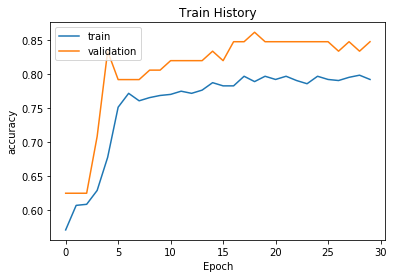

In [20]:
show_train_history(train_history,'accuracy','val_accuracy') 

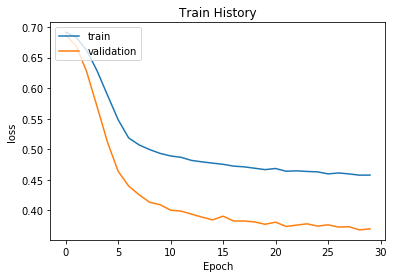

In [21]:
show_train_history(train_history,'loss','val_loss')

In [22]:
scores = model.evaluate(x=test_Features, y= test_Label)

180/180 [==============================] - 0s 16us/step


In [23]:
scores

[0.3492623832490709, 0.855555534362793]

# Confusion Matrix

In [40]:
train_result = model.predict_classes(train_Features)
train_Label = train_Label.astype(int)
train_cm = pd.crosstab(train_Label, train_result.reshape(-1), rownames=['label'], colnames=['predict'])
test_result = model.predict_classes(test_Features)
test_Label = test_Label.astype(int)
test_cm = pd.crosstab(test_Label, test_result.reshape(-1), rownames=['label'], colnames=['predict'])
print('train: \n',train_cm, '\n','test: \n',test_cm)

train: 
 predict    0    1
label            
0        388   45
1         98  180 
 test: 
 predict    0   1
label           
0        105  11
1         15  49


In [25]:
te = (train_cm[0][1]+train_cm[1][0])/len(train_Label)
te = round(te, 2)
ge = (test_cm[0][1]+test_cm[1][0])/len(test_Label)
ge = round(ge, 2)
print('training error :',te,  'testing error :', ge)

training error : 0.2 testing error : 0.14


# 訓練完模型處理測試資料並帶入模型預測

In [26]:
com_data = test_df
com_data[:10]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [27]:
com_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
def pretestdata(raw_data):
    PassengerId = raw_data['PassengerId']
    train_data = raw_data.drop(columns=['Cabin','Ticket','Name','PassengerId'],axis=1)
    age_mean = train_data['Age'].mean()
    train_data['Age'] = train_data['Age'].fillna(age_mean)
    Fare_mean = train_data['Fare'].mean()
    train_data['Fare'] = train_data['Fare'].fillna(Fare_mean)
    train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1}).astype(int)
    onehot_data = pd.get_dummies(data=train_data, columns=['Embarked'])
    ndarray = onehot_data.values
    Features = ndarray
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    
    return scaledFeatures,PassengerId

In [29]:
com_Features, com_ID = pretestdata(test_df)
com_prob = model.predict(com_Features)

In [30]:
# 當存活機率大於>0.6 判定為 1=存活, 0=死亡
com_result = com_prob
con = com_prob >0.6
com_result[con] =1
com_result[~con] = 0

In [31]:
result = test_df.copy()
result.insert(len(test_df.columns),'Survived',com_result)

In [32]:
result = result.drop(columns=['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
result = pd.DataFrame(result)

In [33]:
result.to_csv('result.csv')

In [34]:
com_c = model.predict_classes(com_Features)
result_c = test_df.copy()
result_c.insert(len(test_df.columns), 'Survived',com_result)

In [35]:
result_c = result_c.drop(columns=['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
result_c = pd.DataFrame(result_c)
result_c.to_csv('result_c.csv')